## Import Libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier 
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

plt.rcParams["figure.dpi"] = 500
plt.style.use("ggplot")

## Data Analysis and Data Preprocessing

In [2]:
# Load Data
df = pd.read_csv("Loan_Data.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Shape of the Data
df.shape

(614, 13)

In [4]:
# Summary of Data
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
# Check Null values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
# Check Data Info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


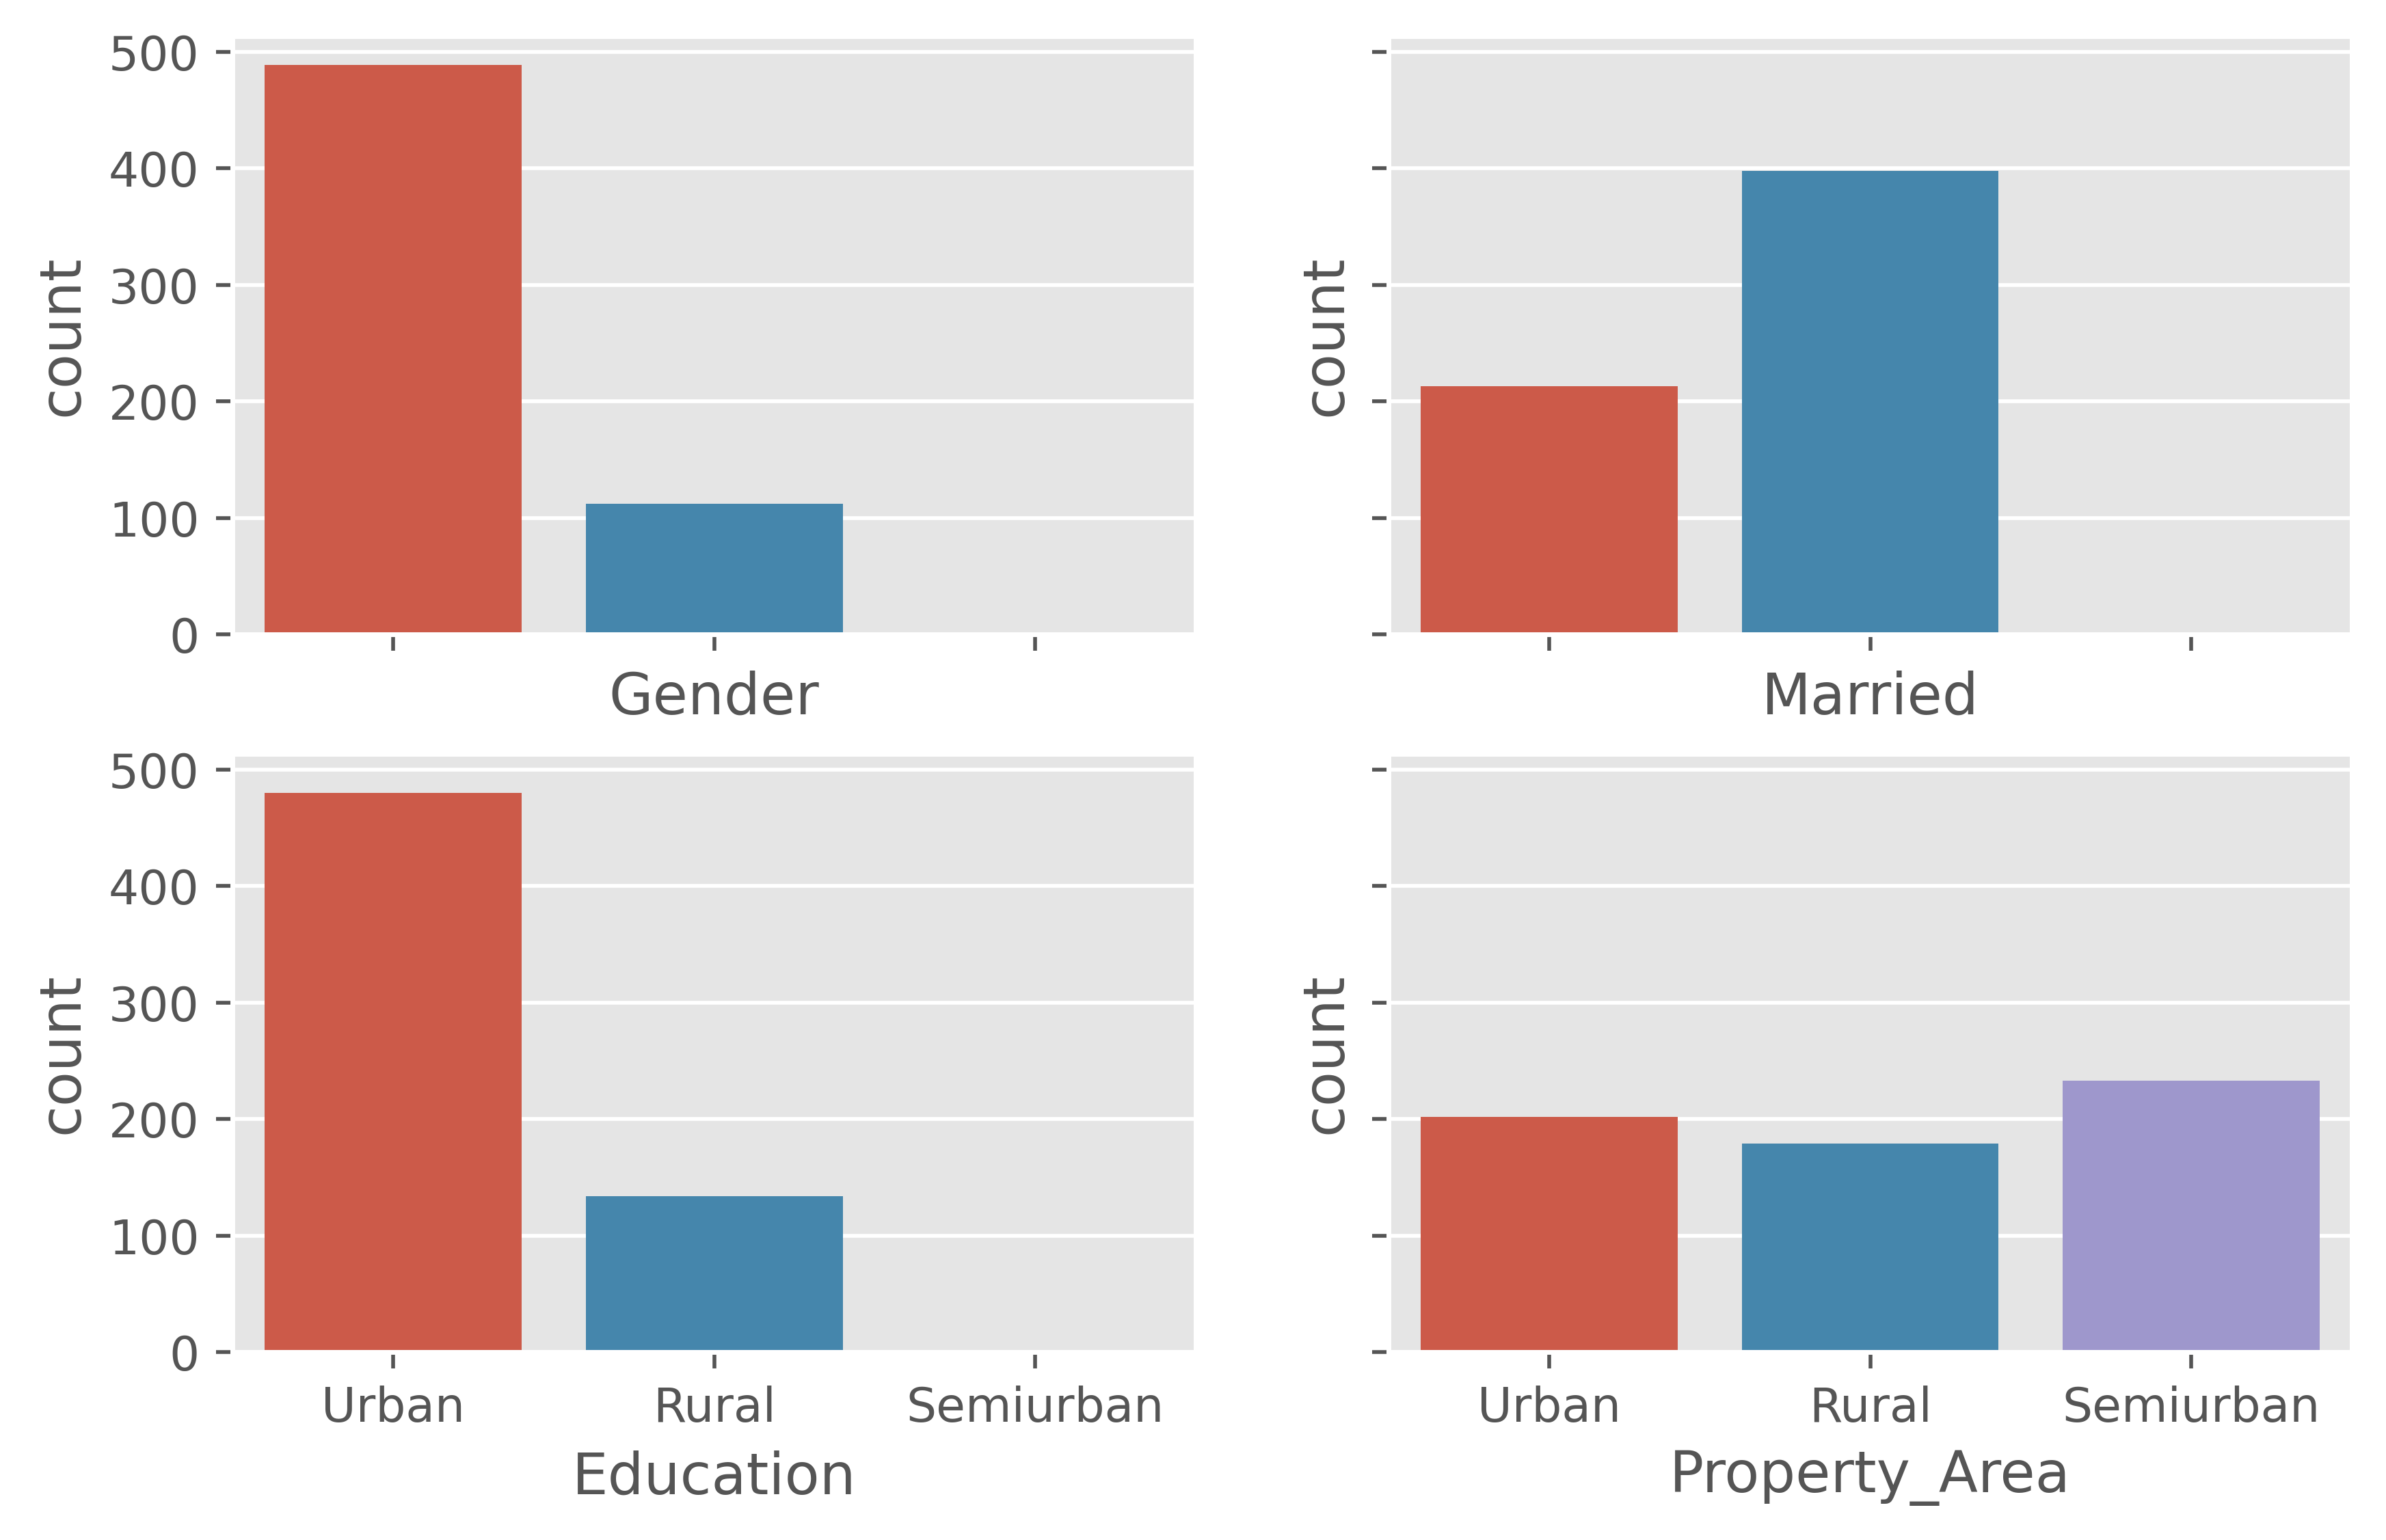

In [7]:
# Count Plot of categorical columns

fig,axes= plt.subplots(2,2,figsize=(8,5),sharex=True,sharey=True)
sns.countplot(x= "Gender",data=df,ax=axes[0][0])
sns.countplot(x= "Married",data=df,ax=axes[0][1])
sns.countplot(x= "Education",data=df,ax=axes[1][0])
sns.countplot(x= "Property_Area",data=df,ax=axes[1][1])
plt.show()

In [8]:
# Drop Loan ID
df.drop("Loan_ID",axis=1,inplace=True)

In [9]:
# Check Unique value in each Categorical Column

columns = df.select_dtypes(include="object").columns

for col in columns:
    unique = list(df[col].unique())
    print(f"{col} : ",unique)

Gender :  ['Male', 'Female', nan]
Married :  ['No', 'Yes', nan]
Dependents :  ['0', '1', '2', '3+', nan]
Education :  ['Graduate', 'Not Graduate']
Self_Employed :  ['No', 'Yes', nan]
Property_Area :  ['Urban', 'Rural', 'Semiurban']
Loan_Status :  ['Y', 'N']


In [10]:
# Numerical Columns

df.select_dtypes(exclude="object").columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

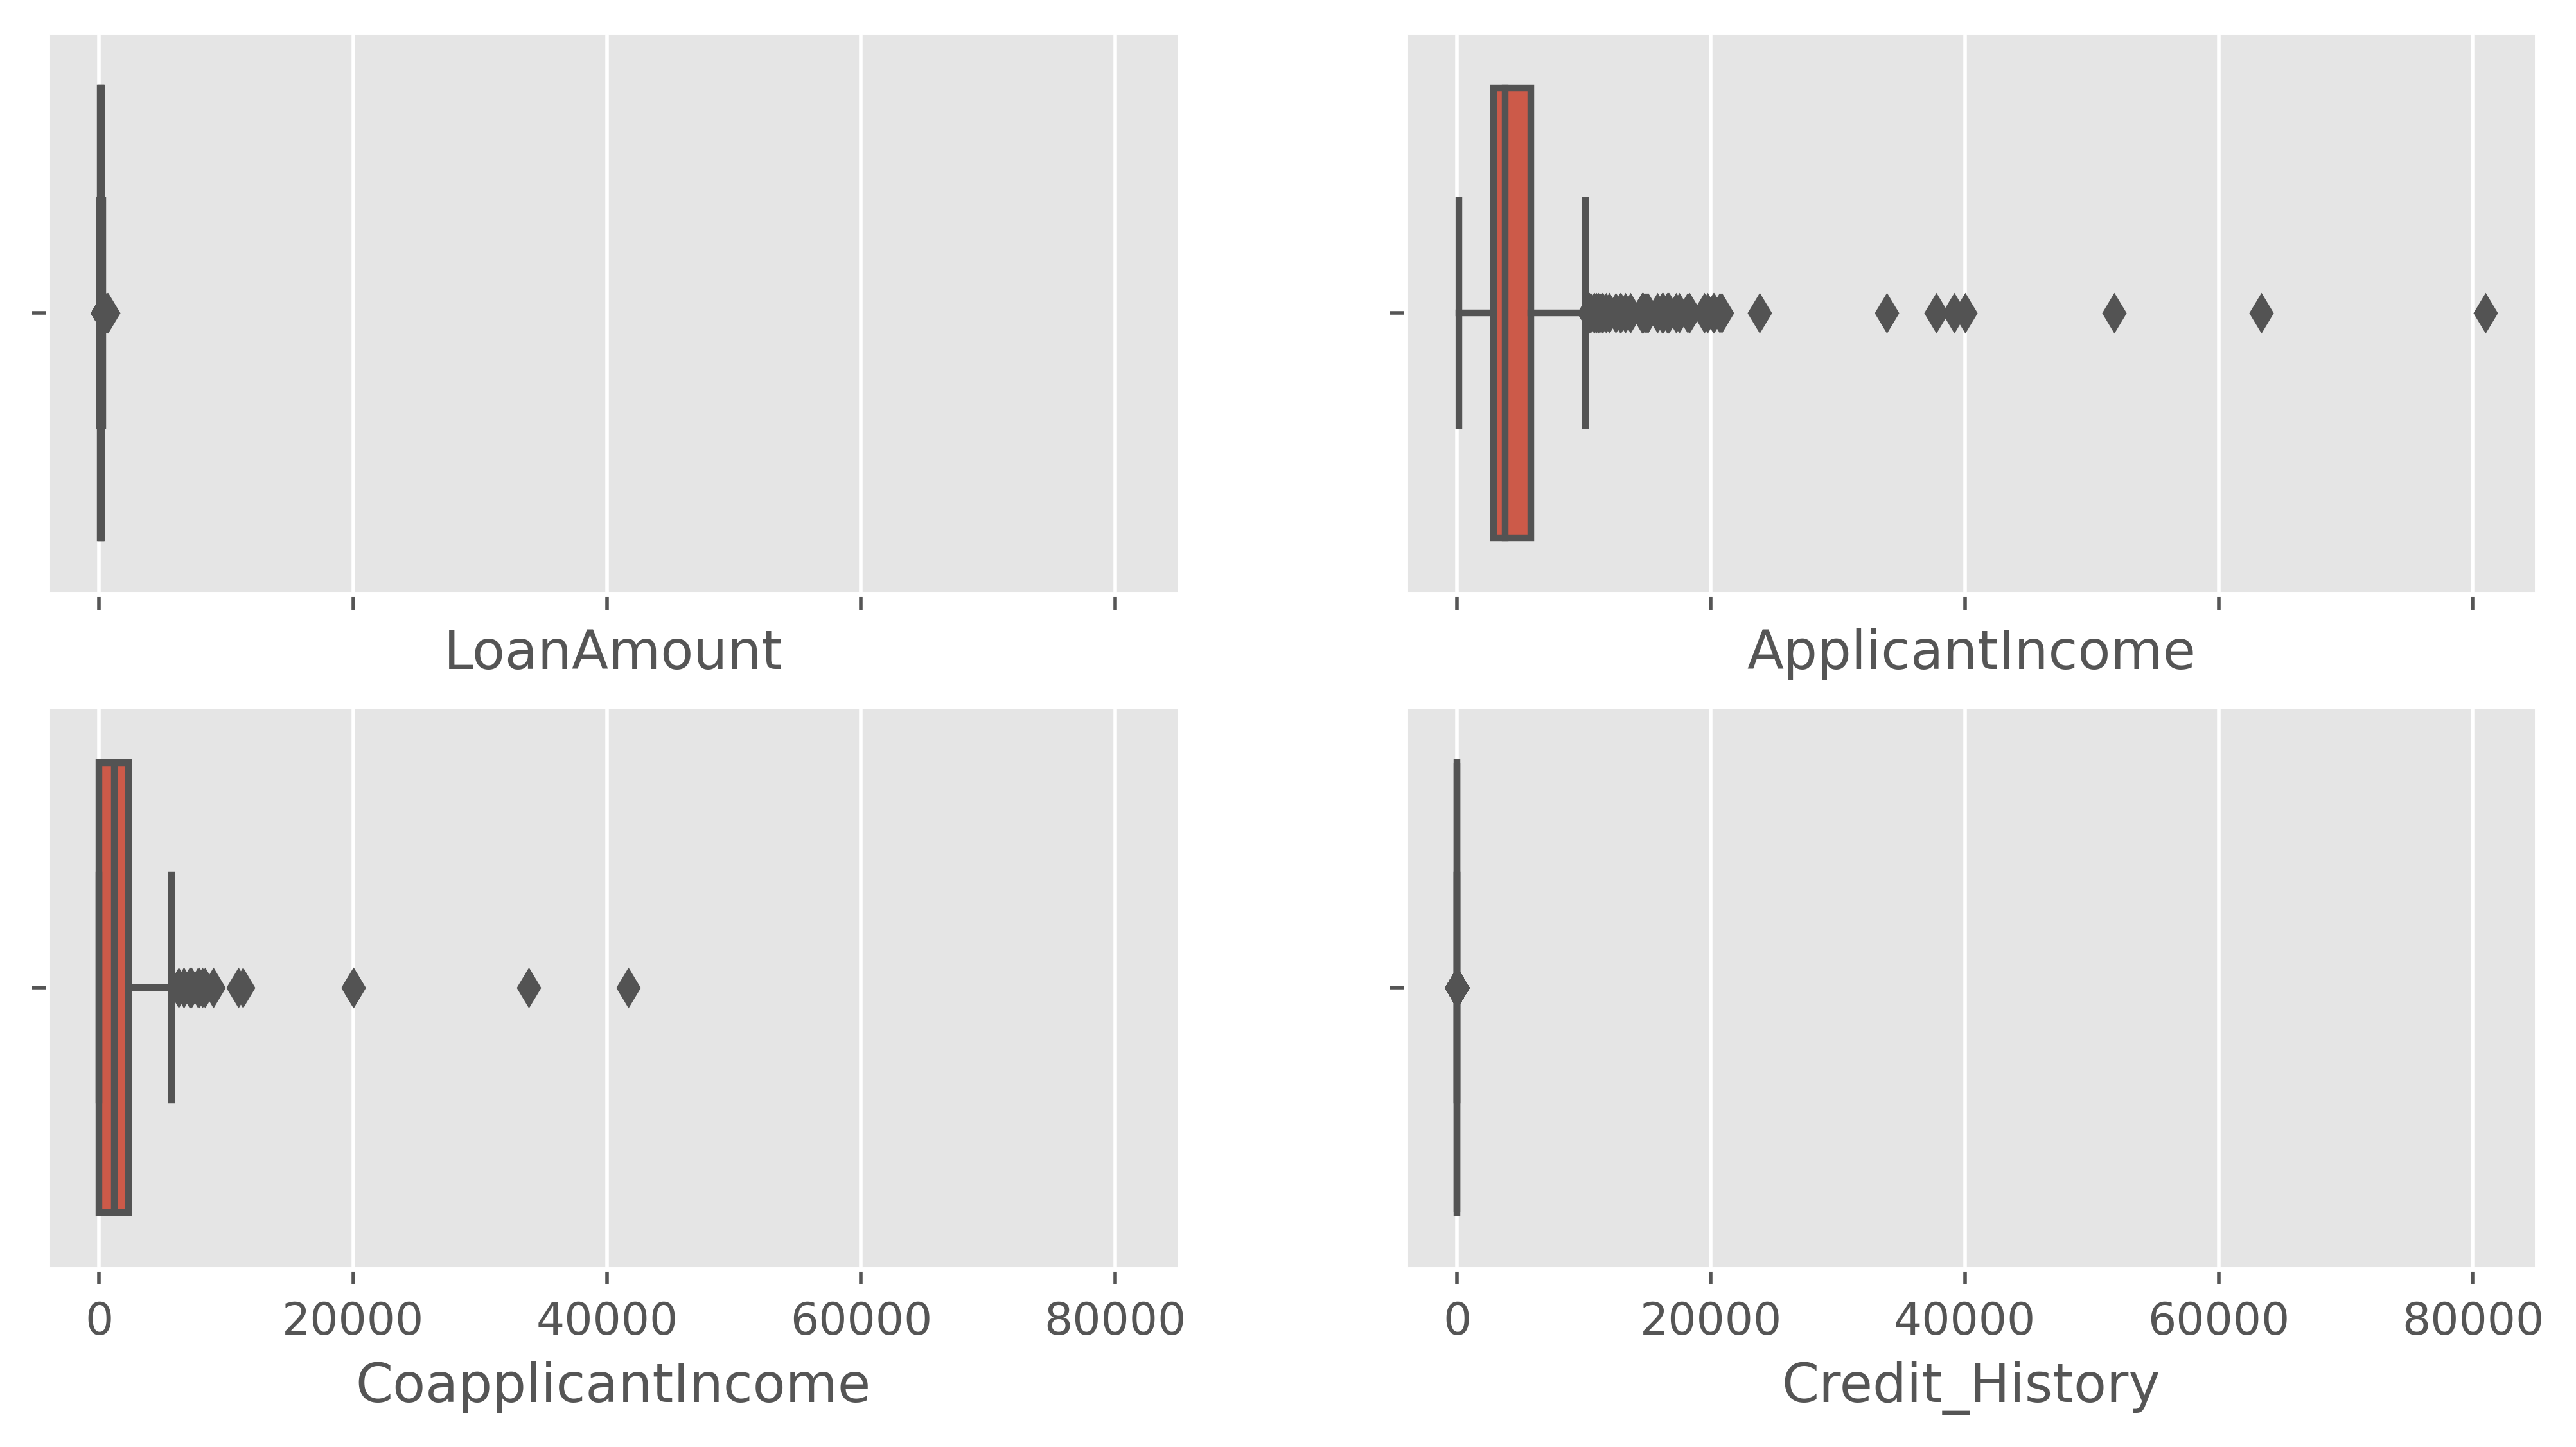

In [11]:
# Checking Outliers

figs, axe = plt.subplots(2,2,figsize=(10,5),sharex=True,sharey=True)
sns.boxplot(x="LoanAmount",data=df,ax=axe[0][0])
sns.boxplot(x="ApplicantIncome",data=df,ax=axe[0][1])
sns.boxplot(x="CoapplicantIncome",data=df,ax=axe[1][0])
sns.boxplot(x="Credit_History",data=df,ax=axe[1][1])
plt.show()


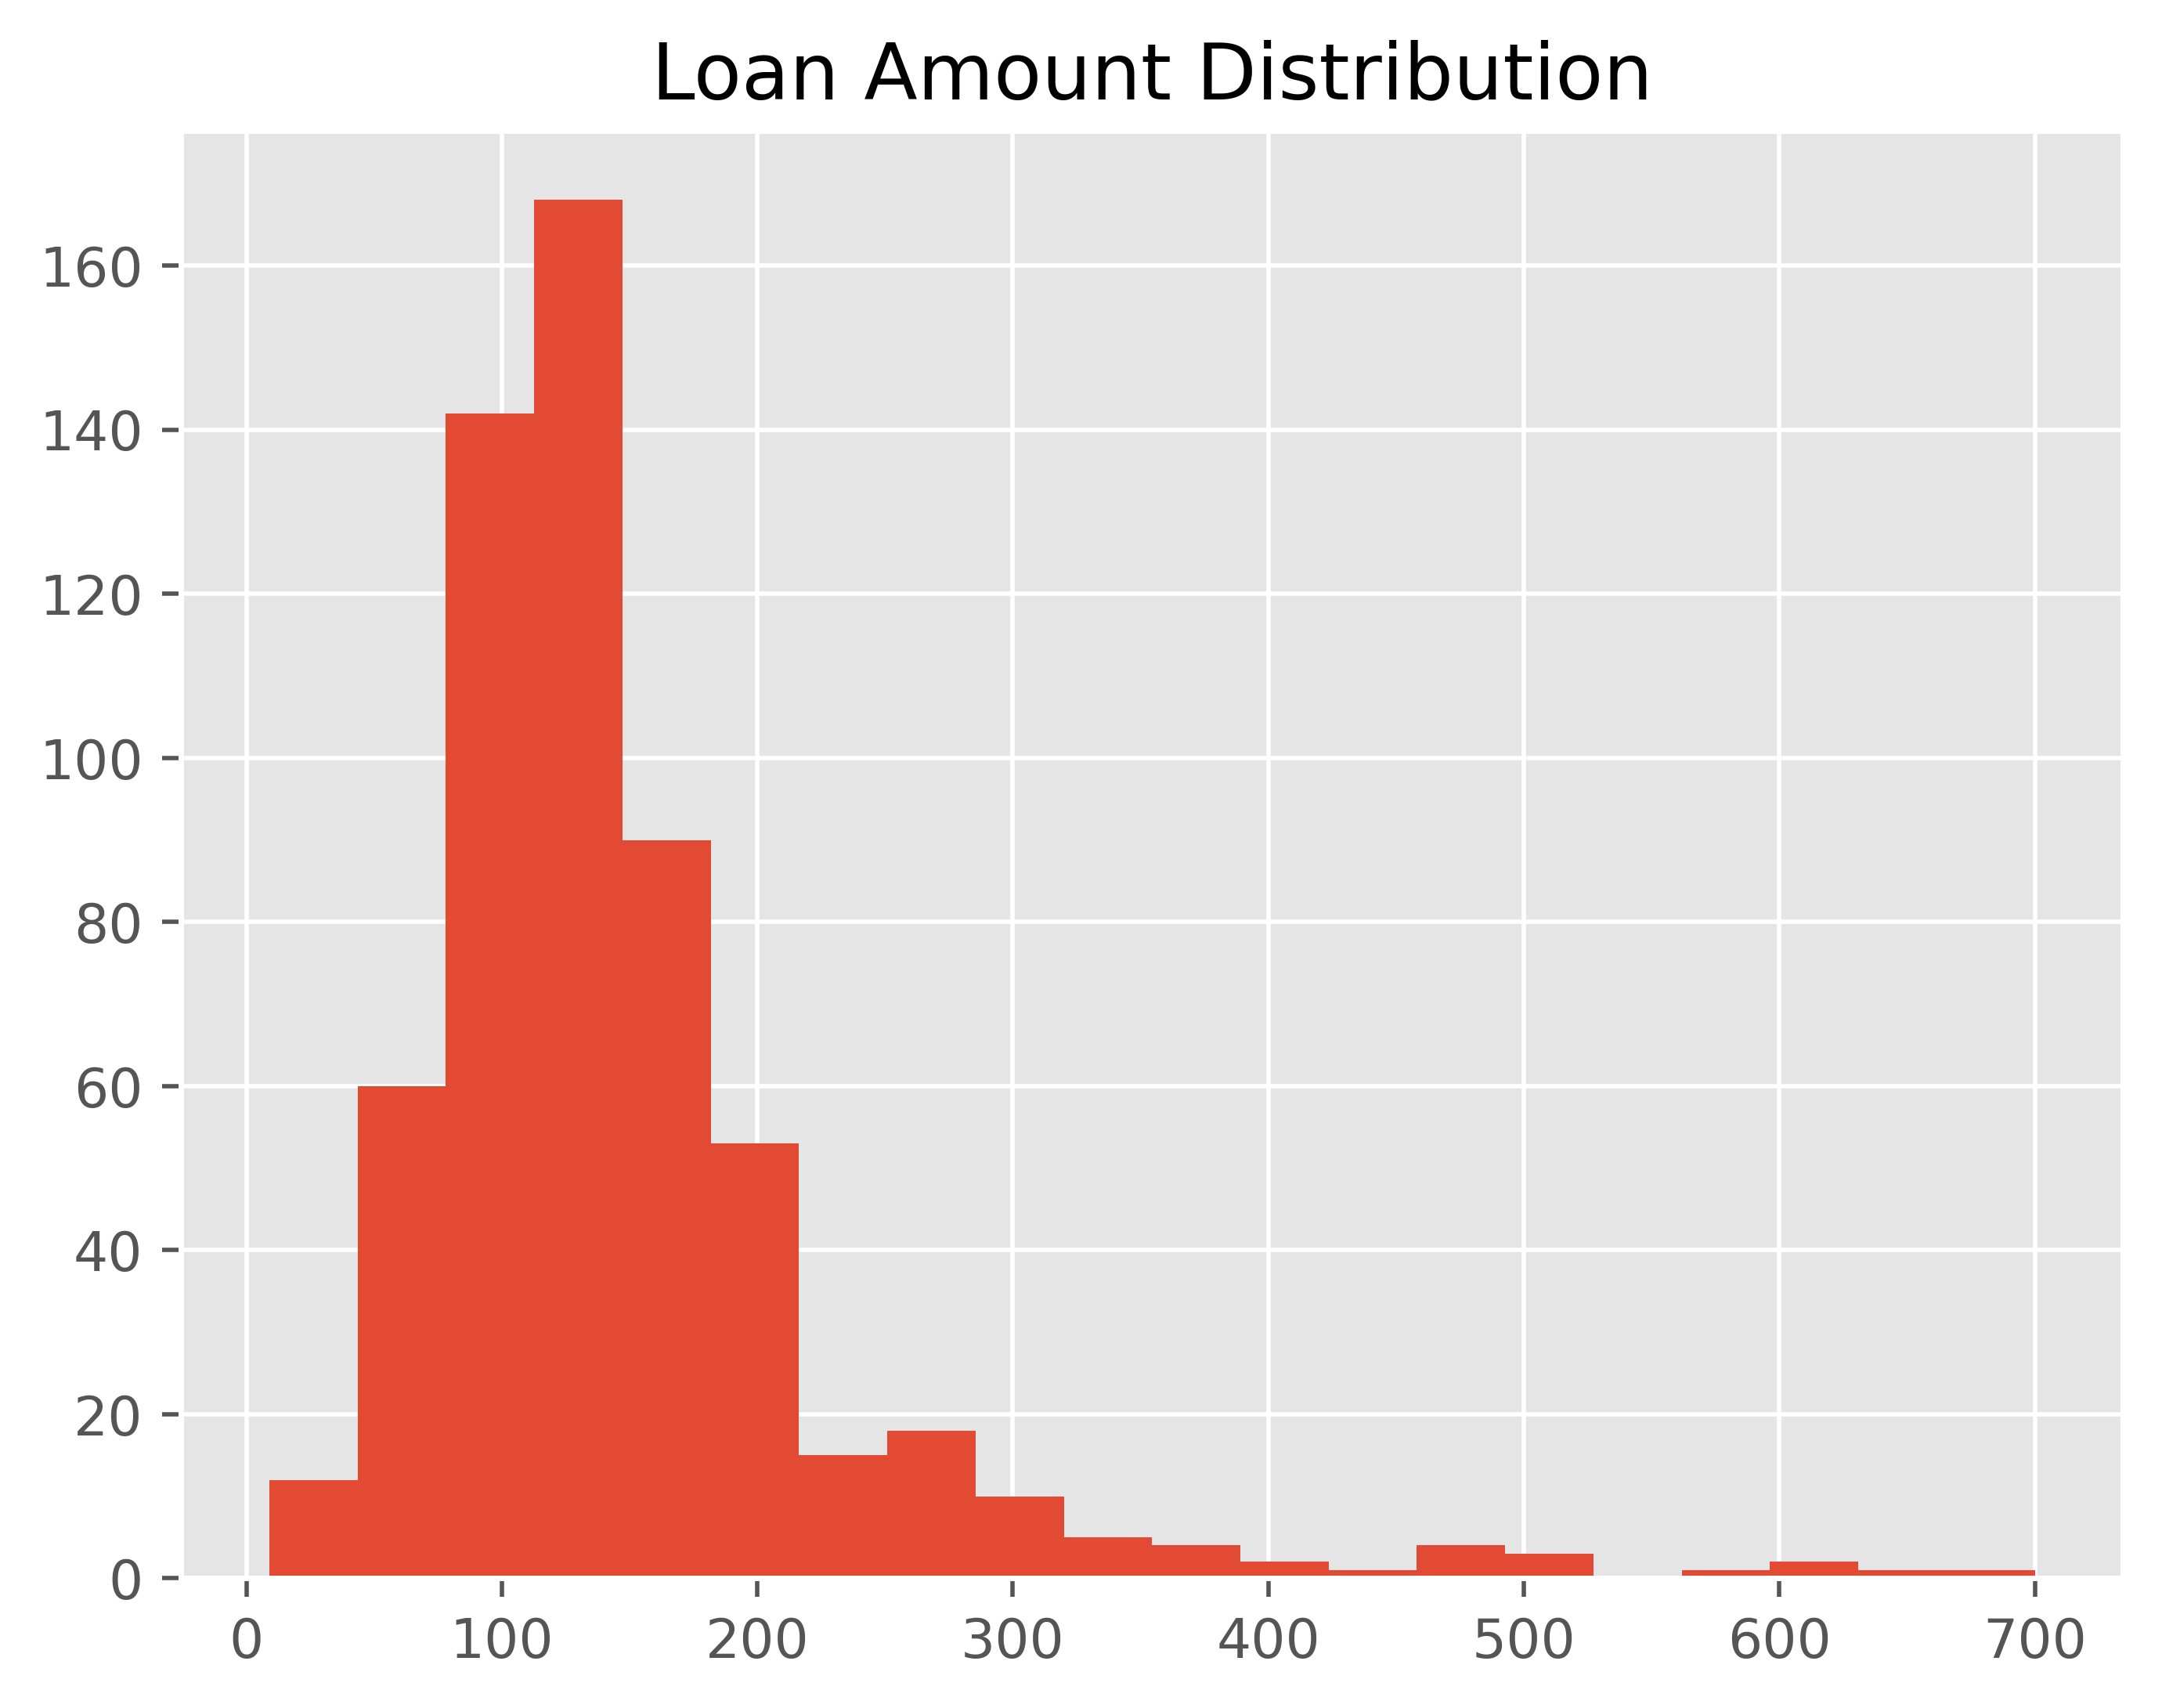

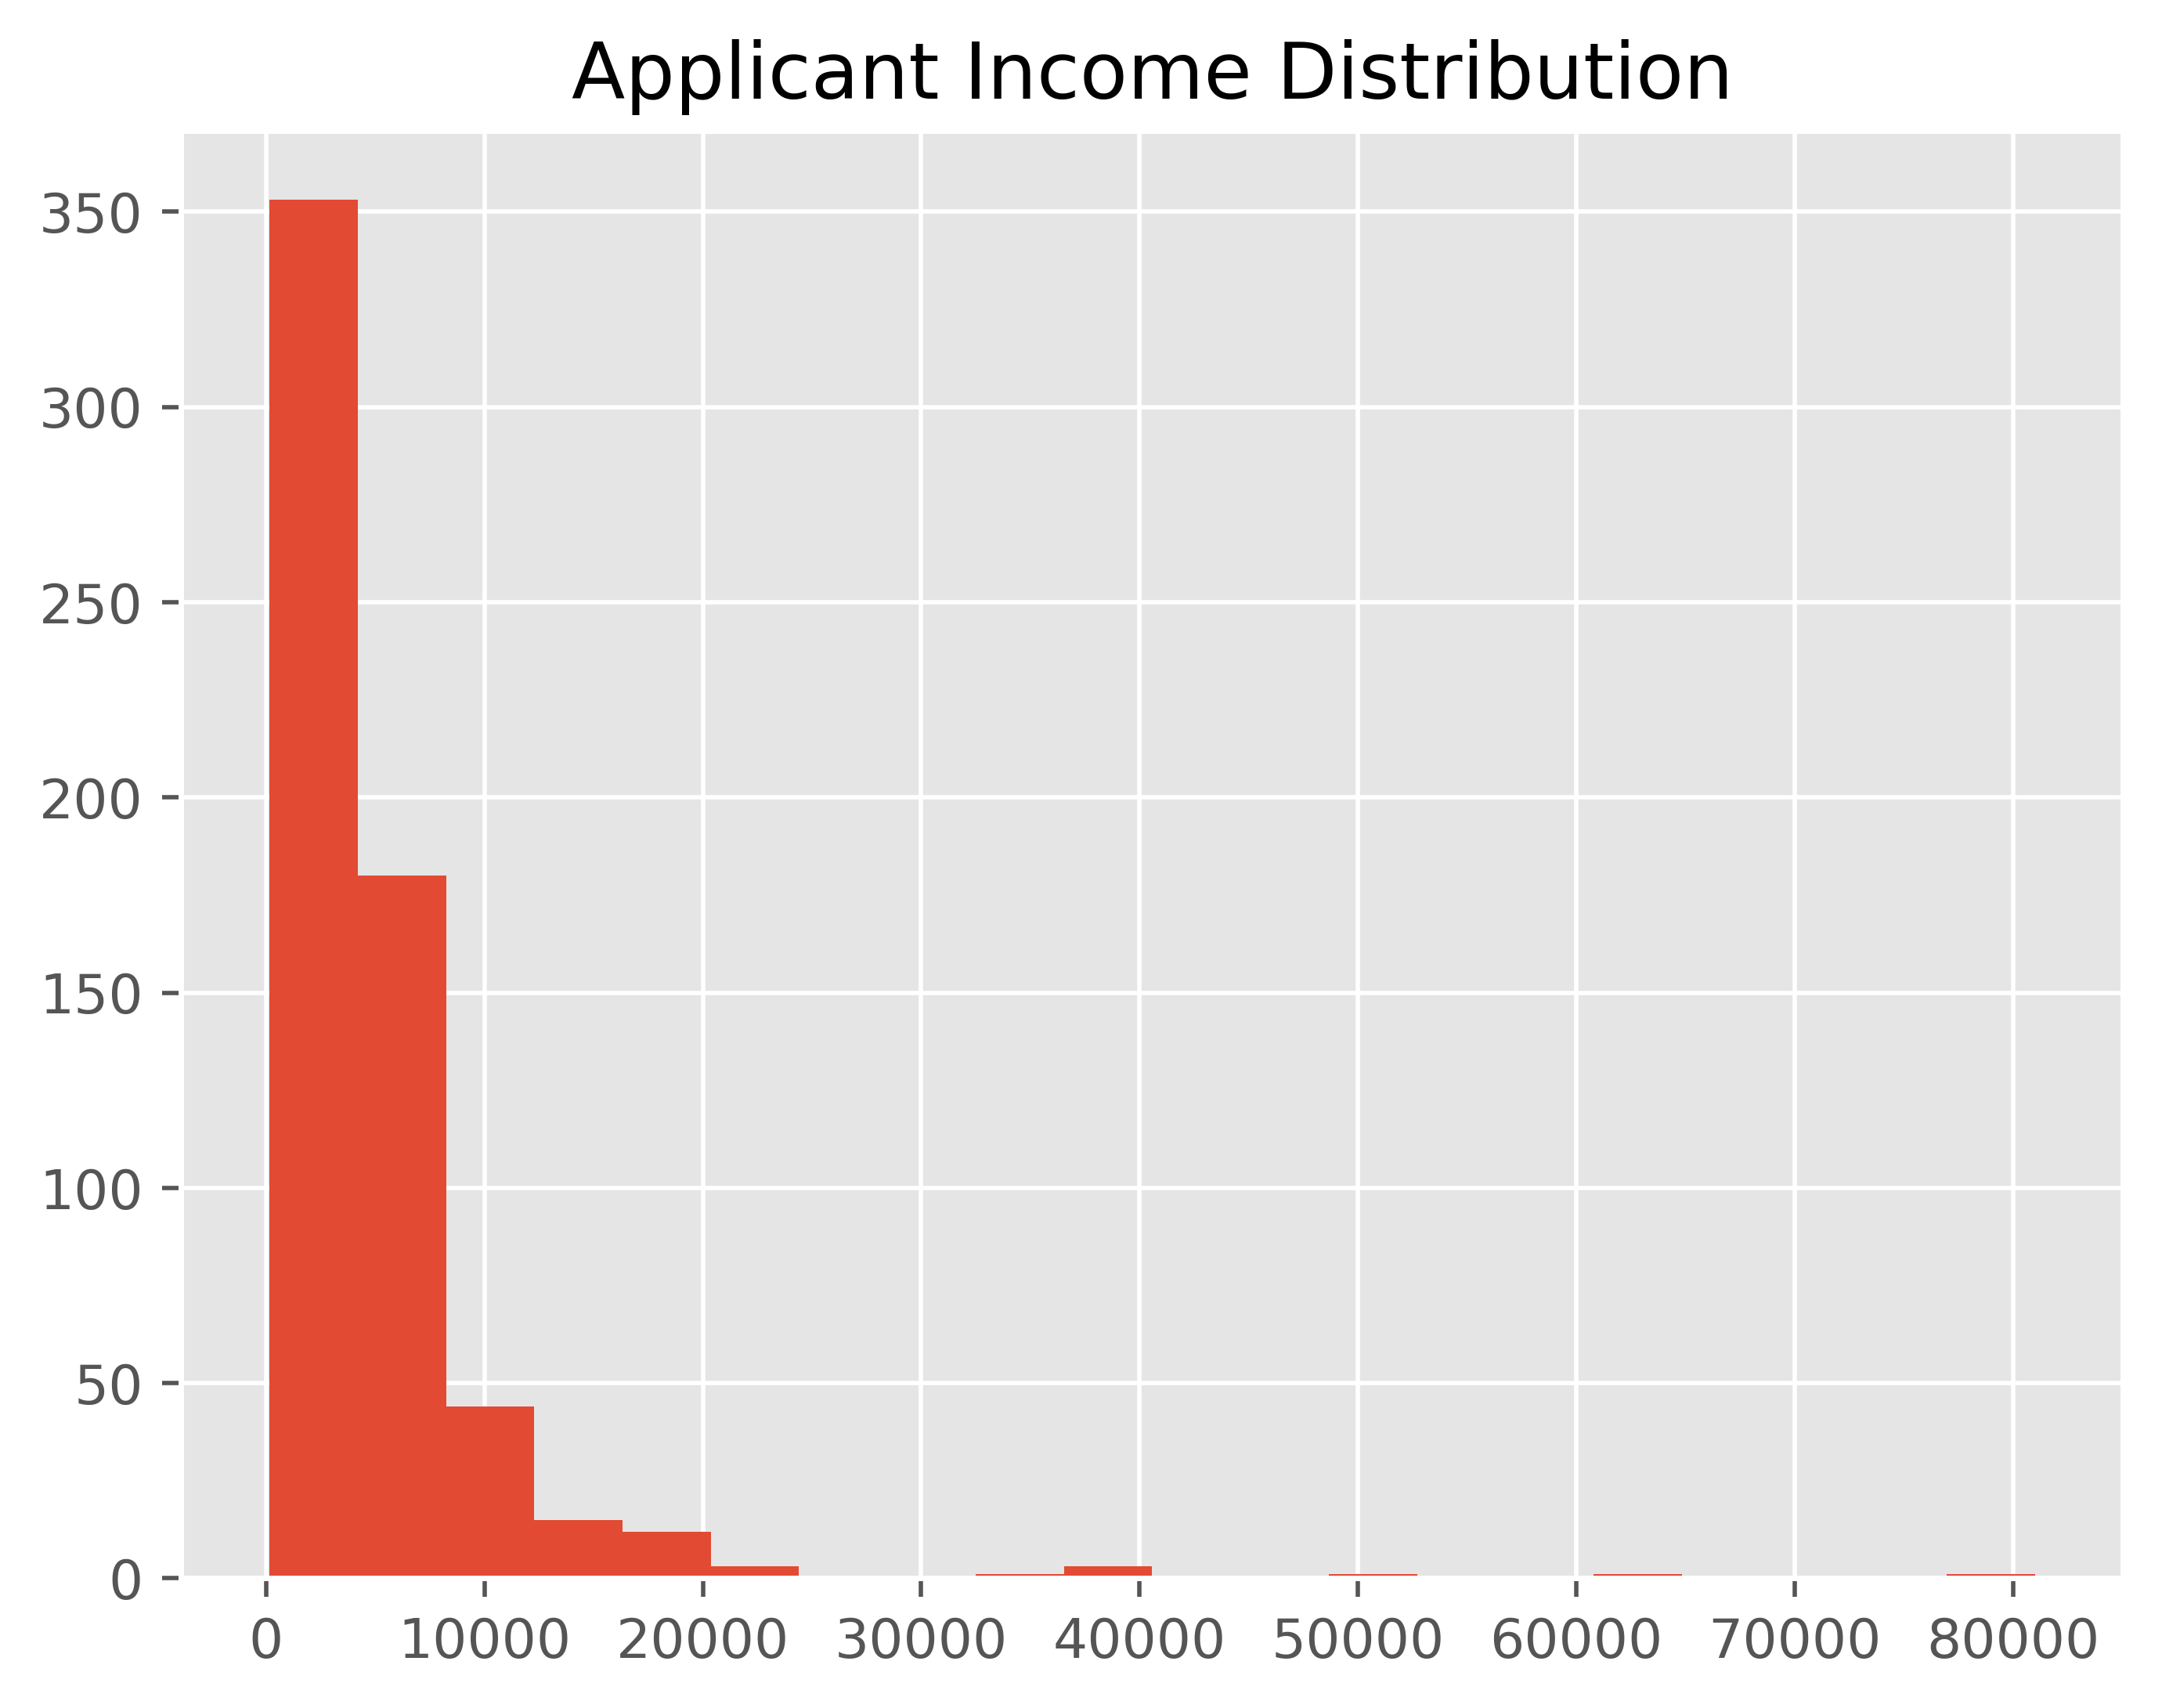

In [12]:
df["LoanAmount"].hist(bins=20)
plt.title("Loan Amount Distribution")
plt.show()

df["ApplicantIncome"].hist(bins=20)
plt.title("Applicant Income Distribution")
plt.show()

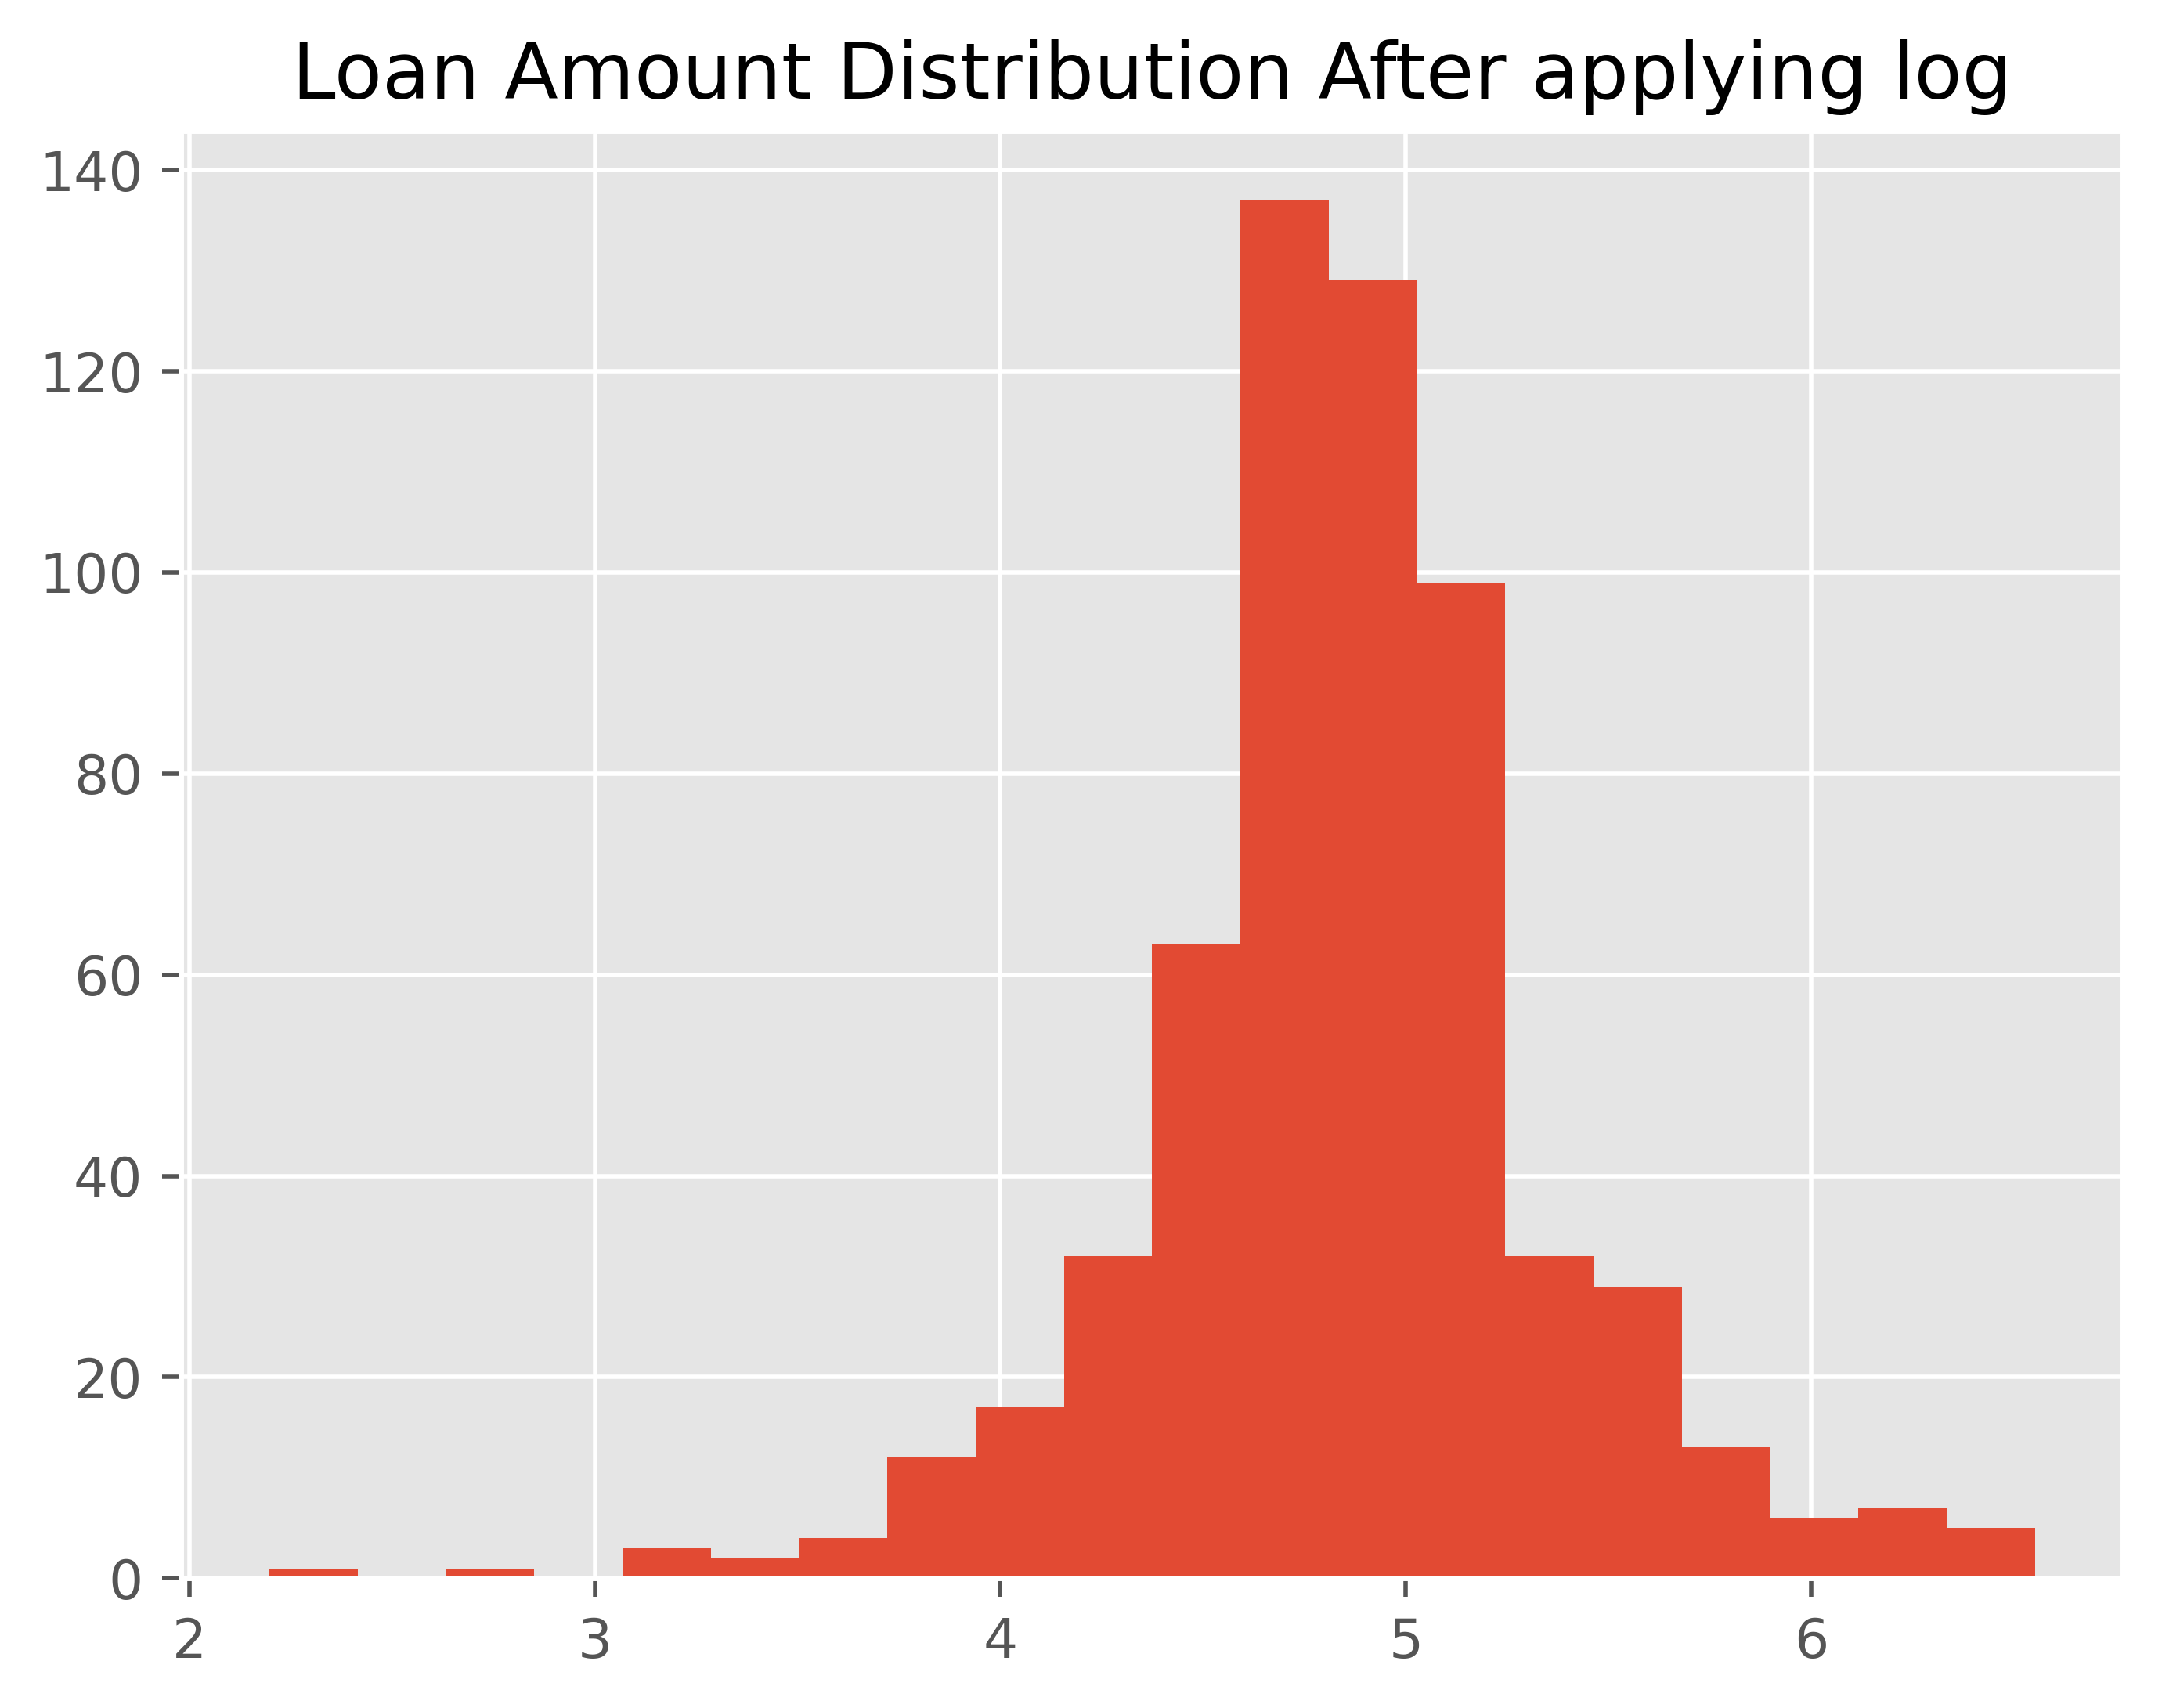

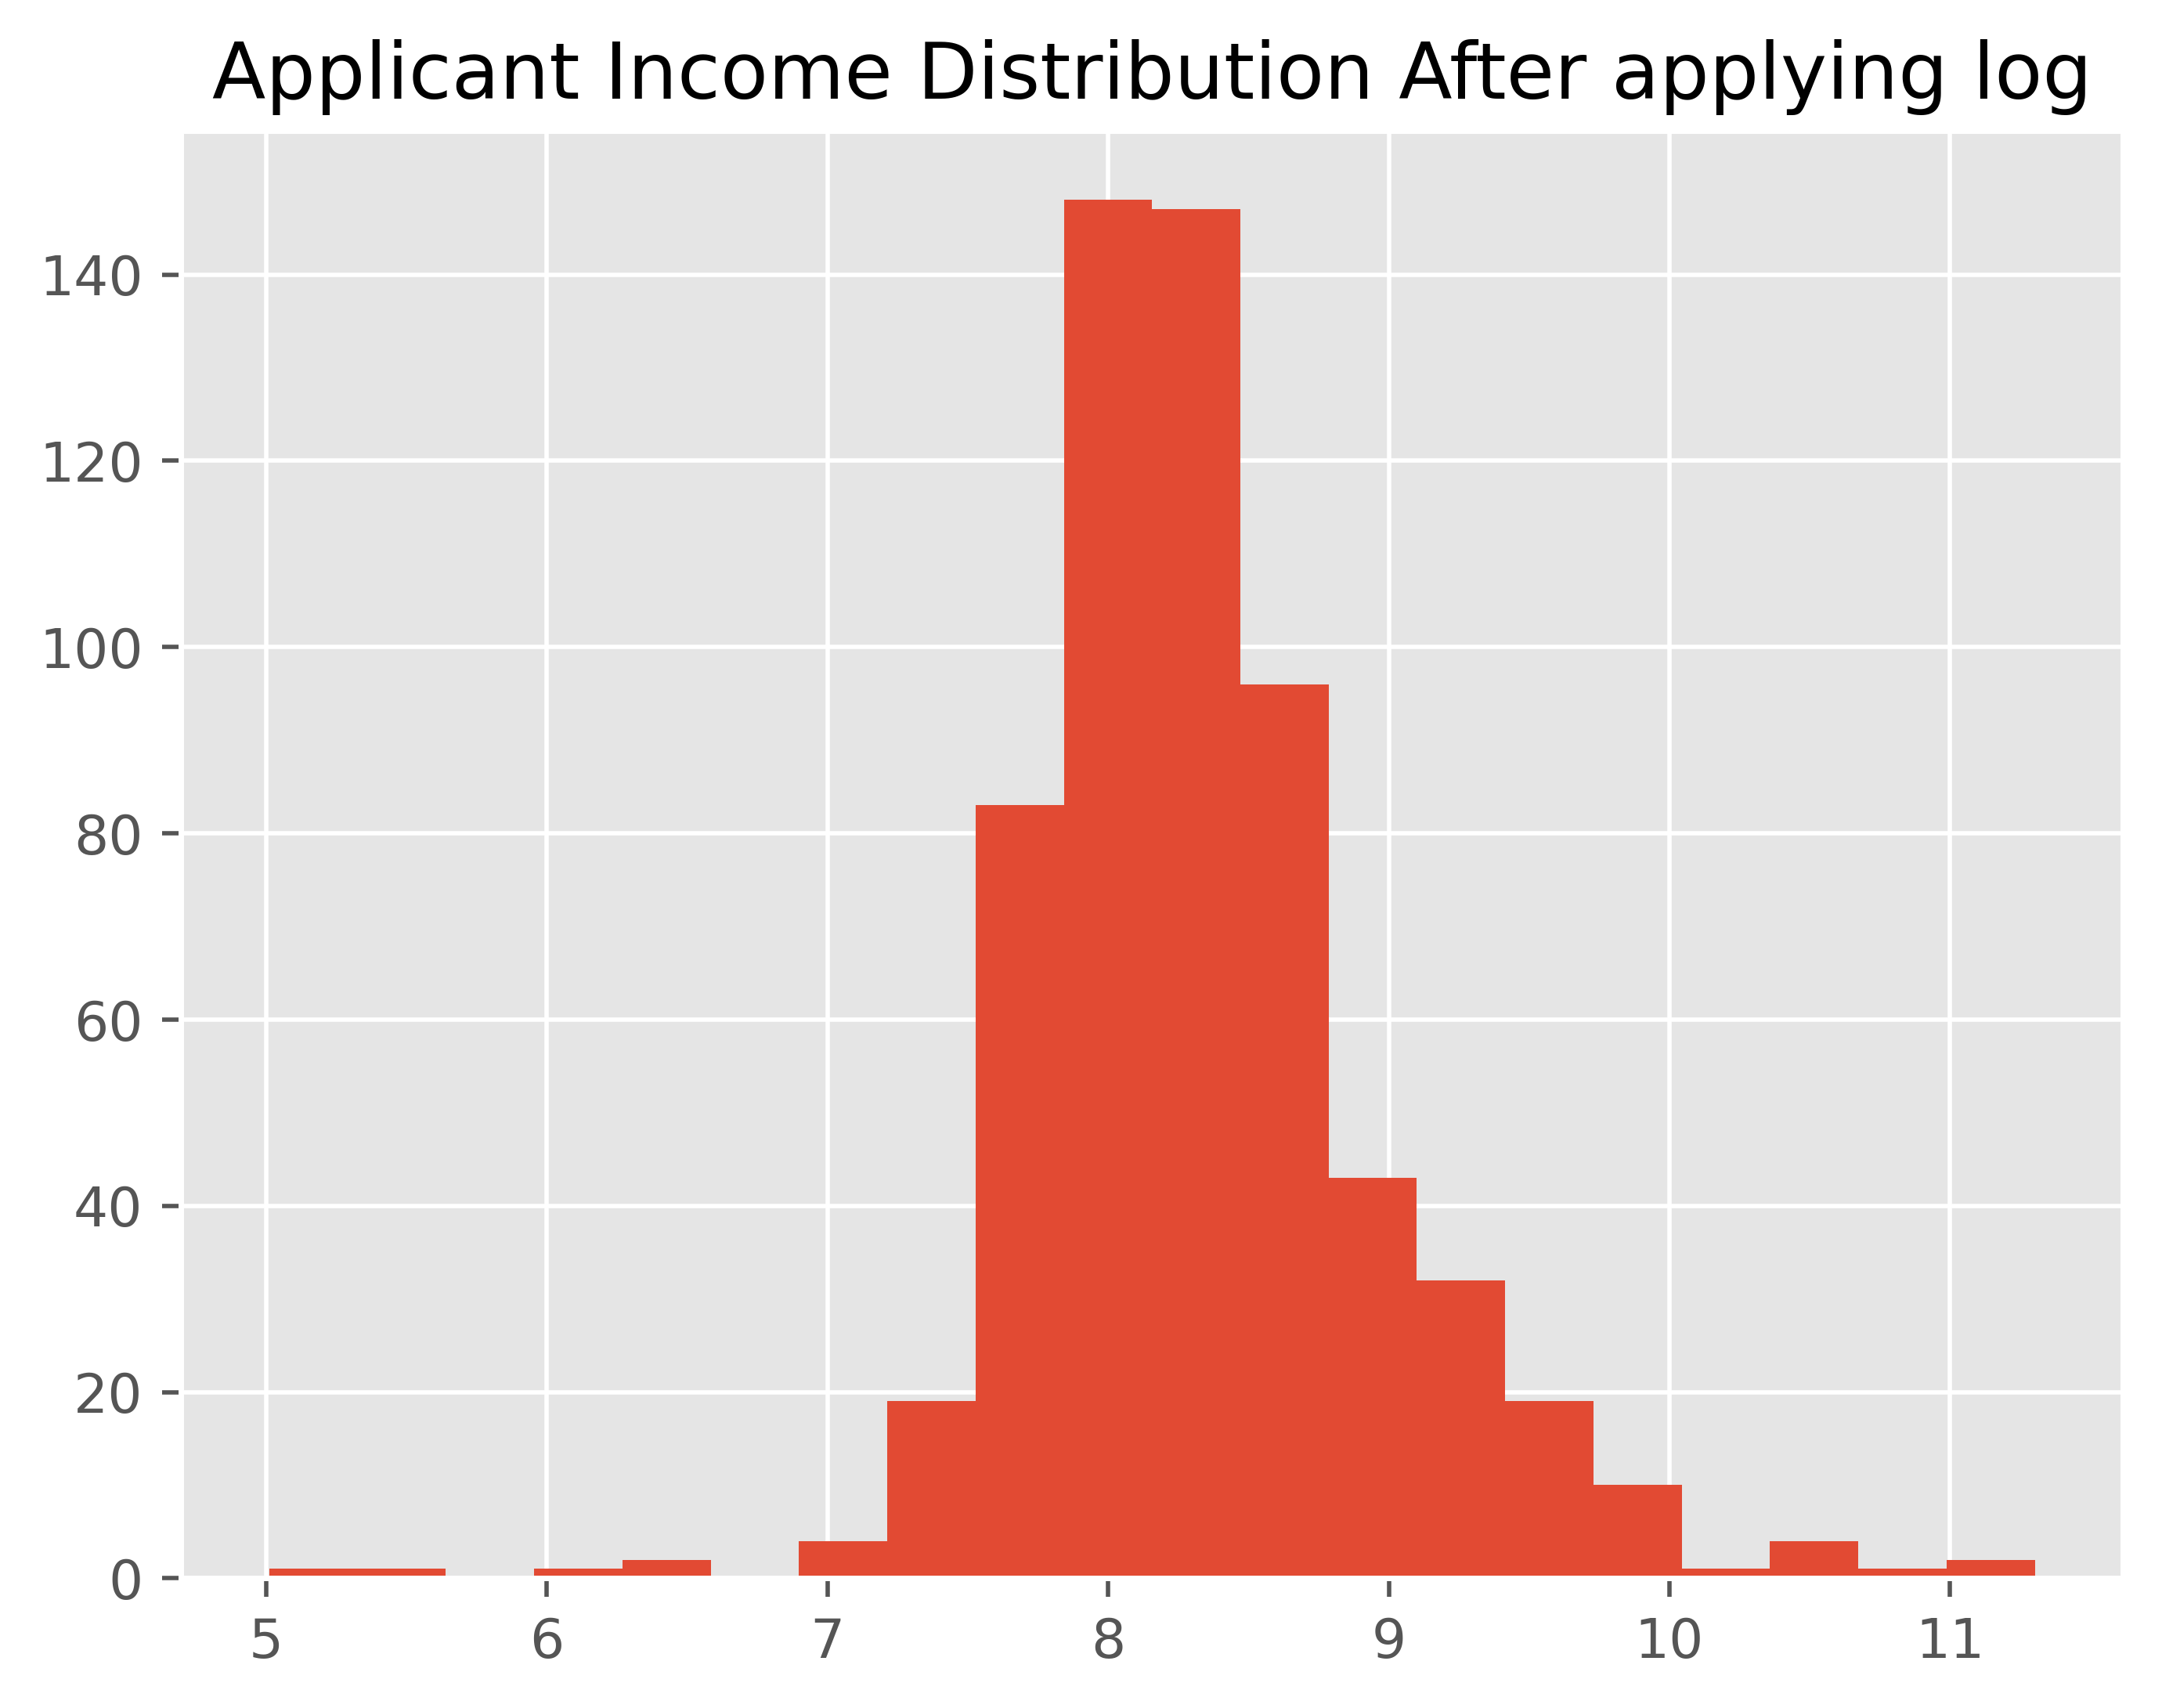

In [13]:
# Plotting Distribution after applying log

df["LoanAmount_log"] = np.log(df["LoanAmount"])
df["ApplicantIncome_log"] = np.log(df["ApplicantIncome"])

df["LoanAmount_log"].hist(bins=20)
plt.title("Loan Amount Distribution After applying log")
plt.show()

df["ApplicantIncome_log"].hist(bins=20)
plt.title("Applicant Income Distribution After applying log")
plt.show()

In [14]:
# Fill the null values in each column with mean and mode

n_cols = ["Gender","Married","Self_Employed","Dependents","Loan_Amount_Term","Credit_History"]

for x in n_cols:
    df[x].fillna(df[x].mode()[0],inplace=True)
    
df["LoanAmount"].fillna(df["LoanAmount"].mean(),inplace=True)
df["LoanAmount_log"].fillna(df["LoanAmount_log"].mean(),inplace=True)
df["ApplicantIncome_log"].fillna(df["ApplicantIncome_log"].mean(),inplace=True)

In [15]:
df["TotalIncome"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

In [16]:
# Check null values again

df.isnull().sum()

Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
LoanAmount_log         0
ApplicantIncome_log    0
TotalIncome            0
dtype: int64

In [17]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,ApplicantIncome_log,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,8.674026,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,8.430109,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,8.006368,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,7.856707,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,8.699515,6000.0


In [18]:
X = df[["Gender","Married",
        "Dependents",
        "Education",
        "Self_Employed",
        "Loan_Amount_Term",
        "Credit_History",
        "Property_Area",
        "LoanAmount_log",
        "ApplicantIncome_log",
        "TotalIncome"
       ]].copy()

Y = df[['Loan_Status']].replace({'Y':1,'N':0})
Y = Y.values

In [19]:
# Column Transformation

cat_col = list(X.select_dtypes(include="object").columns)
num_col = list(X.select_dtypes(exclude="object").columns)

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OrdinalEncoder(),cat_col),
        ('num', StandardScaler(), num_col)
    ], remainder ='passthrough'
)

transformed_data = preprocessor.fit_transform(X)


In [20]:
transformed_data

array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.51619904, -0.18218376],
       [ 1.        ,  1.        ,  1.        , ..., -0.01092417,
         0.13787935, -0.14468416],
       [ 1.        ,  1.        ,  0.        , ..., -1.34746176,
        -0.51935169, -0.62365632],
       ...,
       [ 1.        ,  1.        ,  1.        , ...,  1.36391864,
         1.0158296 ,  0.19947539],
       [ 1.        ,  1.        ,  2.        , ...,  0.753978  ,
         0.91890274,  0.08651172],
       [ 0.        ,  0.        ,  0.        , ...,  0.06639542,
         0.13787935, -0.37835935]])

In [28]:
X_train,X_test,Y_train,Y_test = train_test_split(transformed_data,Y,test_size=0.2,random_state=0)

## Model Building and Testing

In [39]:
models ={
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'NaiveBayes':GaussianNB(),
    'XGBoost':XGBClassifier(),
    'SVC':SVC()
}

for name,obj in models.items():
    model = obj
    model.fit(X_train,Y_train.flatten())
    ypred = model.predict(X_test)
    accuracy = accuracy_score(Y_test.flatten(),ypred)
    print(f"{name} : {accuracy}")
    clf_report = classification_report(Y_test.flatten(),ypred)
    print(clf_report)
    


DecisionTree : 0.7642276422764228
              precision    recall  f1-score   support

           0       0.55      0.70      0.61        33
           1       0.88      0.79      0.83        90

    accuracy                           0.76       123
   macro avg       0.71      0.74      0.72       123
weighted avg       0.79      0.76      0.77       123

RandomForest : 0.8048780487804879
              precision    recall  f1-score   support

           0       0.71      0.45      0.56        33
           1       0.82      0.93      0.87        90

    accuracy                           0.80       123
   macro avg       0.77      0.69      0.72       123
weighted avg       0.79      0.80      0.79       123

NaiveBayes : 0.8373983739837398
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86     

## Model Tunning

In [51]:
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  
}
gnb = GaussianNB()
grid_search = GridSearchCV(gnb,param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train, Y_train.flatten())

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best cross-validation score:", best_score)

# Evaluate the model with best parameters on the test set
best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, Y_test.flatten())
print("Test set accuracy with best parameters:", test_score)

Best parameters: {'var_smoothing': 1e-09}
Best cross-validation score: 0.8024324881467738
Test set accuracy with best parameters: 0.8373983739837398
